In [0]:
%matplotlib inline
from fastai.basics import *

**linear regression problem**

In [2]:
n=100
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[0.7536, 1.0000],
        [0.4533, 1.0000],
        [0.7794, 1.0000],
        [0.0456, 1.0000],
        [0.6170, 1.0000]])

In [3]:
a = tensor(3.,2); a

tensor([3., 2.])

here x@a is matrix multiplication

In [0]:
y = x@a + torch.rand(n)

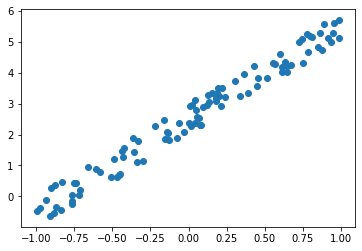

In [5]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): 
  return ((y_hat-y)**2).mean()

**sample data for a**

In [7]:
a = tensor(-1.,1)
y_hat = x@a
mse(y_hat, y)

tensor(8.1804)

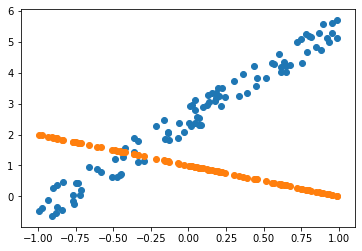

In [8]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

**Gradient Descent**

We would like to find the values of a that minimize mse_loss.

In [9]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
  y_hat = x@a
  loss = mse(y,y_hat)
  if t%10 == 0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [13]:
lr = 1e-1
for t in range(100): 
  update()

tensor(8.1804, grad_fn=<MeanBackward0>)
tensor(1.4199, grad_fn=<MeanBackward0>)
tensor(0.4178, grad_fn=<MeanBackward0>)
tensor(0.1734, grad_fn=<MeanBackward0>)
tensor(0.1120, grad_fn=<MeanBackward0>)
tensor(0.0965, grad_fn=<MeanBackward0>)
tensor(0.0926, grad_fn=<MeanBackward0>)
tensor(0.0916, grad_fn=<MeanBackward0>)
tensor(0.0914, grad_fn=<MeanBackward0>)
tensor(0.0913, grad_fn=<MeanBackward0>)


In [20]:
y_hat = x@a
y_hat.detach_()

tensor([ 4.7698,  3.8655,  4.8476,  2.6375,  4.3586,  1.6064,  2.0833,  3.6777,
         2.7830,  5.1032,  4.4449,  2.3097,  0.3522,  0.6727,  4.4172,  2.9659,
         2.0941,  3.0442, -0.2180,  0.2033,  2.6724,  2.7189,  5.0579,  2.6232,
        -0.4937, -0.0110,  1.4051, -0.2325,  1.1953, -0.1212,  5.3117,  4.5286,
         2.0360,  2.8725,  5.3722,  1.1759,  4.1695,  5.4691,  2.5182, -0.4323,
         3.2221,  3.8029,  1.0777,  4.3416,  2.5762,  0.2436,  2.0160,  1.1303,
         0.1915,  3.1013,  1.2263,  3.0858,  4.9510,  3.0551,  5.3684,  5.4732,
        -0.0241,  0.7422,  3.4200,  2.1190,  4.0505,  5.2597,  1.4807,  1.0323,
         2.8956,  2.7447,  1.4981,  3.1482,  3.0373,  0.5133,  0.2819,  3.5135,
         3.1649,  2.4169,  0.3265,  5.1902,  2.6389,  4.6787,  2.5574,  2.2804,
         4.4398,  1.1503,  2.9115,  1.8412,  0.9725,  4.2119, -0.1333,  3.8518,
         5.1412,  1.4141,  3.5971,  4.7499,  4.9022, -0.1573,  4.8702, -0.3143,
         4.3113,  0.1876,  2.5396,  2.71

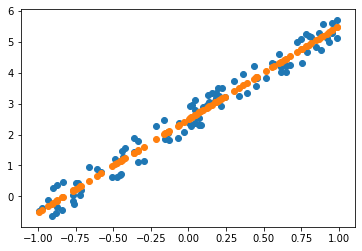

In [21]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

**To Animate this learning!!**

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [27]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_hat = x@a
y_hat.detach_()
line, = plt.plot(x[:,0], y_hat)
plt.close()

def animate(i):
    update()
    y_hat = x@a
    y_hat.detach_()
    line.set_ydata(y_hat)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)